# 21 Sept 23 - Activity: ODE Games

Y'all have worked with several different ODEs. We've learned that we can use phase space to investigate different potential families of solutions. We've learned how to read information from phase space for systems we are familiar with like the SHO and the large angle Pendulum. We've also learned how to use numerical integration to find trajectories of the system in time and in phase space, and how chaotic systems behave. Today, you will investigate a new model. There's quite a few well-known models. 

Some of these models are listed below with links to articles describing them or the ideas related to them. *This is for reference, you don't need to read or understand anything deeply from these articles.*

A few 2nd order models:

1. [Double Well Potential:](https://en.wikipedia.org/wiki/Double-well_potential) 

$$\dot{x}=y; \dot{y} = -x+y(1-x^2)$$

2. [Dipole Fixed Points:](https://en.wikipedia.org/wiki/Stability_theory) 

$$\dot{x} = 2xy; \dot{y} = y^2 - x^2$$

3. [Anharmonic Oscillator (Symmetric)](https://en.wikipedia.org/wiki/Anharmonicity) 

$$m\ddot{x} + b\dot{x} + k_1 x + k_2 x^3 = 0$$


4. [Duffing Oscillator](https://en.wikipedia.org/wiki/Duffing_equation) 

$$\ddot{x} + x + \epsilon x^3=0$$

5. [Glycolysis model](https://en.wikipedia.org/wiki/Glycolytic_oscillation)

$$\dot{x} = -x + ay + x^2 y ; \dot{y} = b - ay - x^2y$$


6. [Coupled synchronizing oscillators](https://en.wikipedia.org/wiki/Kuramoto_model):

$$\dot{\theta}_1 = \omega_1 + K_1 \sin(\theta_2 - \theta_1) ; \dot{\theta}_2 = \omega_2 + K_2\sin(\theta_1 - \theta_2) $$


7. [Drop in stokes flow](https://www.princeton.edu/~stonelab/Publications/pdfs/From%20Howard/JFM/StoneNadimStrogatzChaoticStreamlinesJFM1990.pdf)

$$\dot{x} = \frac{\sqrt{2}}{4}x (x-1)\sin(\phi); \dot{\phi} = \frac{1}{2}\left[\beta - \frac{1}{\sqrt 2}\cos(\phi) - \frac{1}{8\sqrt{2}}x\cos(\phi)\right]$$


We want to let your group decide what you want to explore. But a little guidance when making those choices:


1. The 2nd order oscillators are relatively straightforward to implement in the code below if you break them into 1st order ODEs. Remember that you have to do that!
2. Several of these models have parameters, which you can choose, but maybe look into reasonable values. These models are likely the more challenging for this assignment because you have to keep track of and pass parameters.
3. Some of these models have a versions with time depdendent components , i.e., some $F(t)$. Adding these components once you've explored the non-time-dependent version gives a ton more to explore!

## Activity

Pick an ODE as a group and explore it as we have done in class. The critical element here is not only working on making the models but finding where the key components of our model evaluation framework appear in your work. It is ok if it doesn't all show up for you. We will dsicuss as a class how we might see these components in our modeling work. As a reminder, here's the framework:

### Goal: Investigate physical systems (0.30)
 
 - How well does your computational essay <mark>predict</mark> or <mark>explain</mark> the system of interest?
 - How well does your computational essay allow the user to <mark>explore</mark> and <mark>investigate</mark> the system?

### Goal: Construct and document a reproducible process (0.10)

- How well does your computational essay <mark>reproduce</mark> your results and claims?
- How  <mark>well documented</mark> is your computational essay?

### Goal: Use analytical, computational, and graphical approaches (0.30)

- How well does your computational essay document your <mark>assumptions</mark>?
- How well does your computational essay produce an <mark>understandable</mark> and <mark>parsimonious</mark> model?
- How well does your computational essay explain the <mark>limitations</mark> of your analysis?

### Goal: Provide evidence of the quality of their work

- How well does your computational essay <mark>present</mark>  the case for its claims?
- How well <mark>validated</mark>  is your model?

### Goal: Collaborate effectively

- How well did you <mark>share</mark>  in the class's knowledge?
  - How well is that documented in your computational essay?
- How well did you <mark>work with your partner</mark> ? *For those choosing to do so*

Below is some starter code to help you get started.

### Starter Code

Here's some working code from last week when we looked at the Van der Pol oscillator to help you get started on your invesigation.

For reference, the Van der Pol oscillator is given by:

$$
\dot{x} = v \hspace{1in} \dot{v} = -\mu (x^2 - 1)v - x
$$

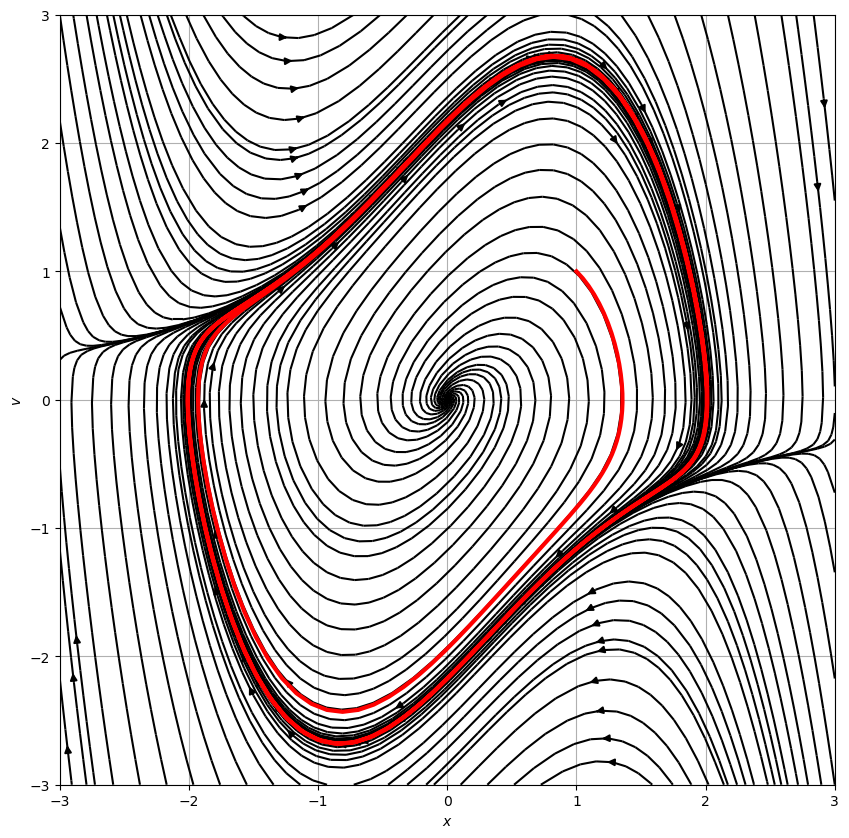

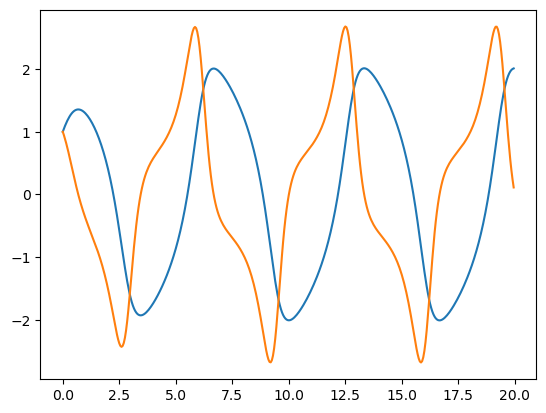

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def VP_eqn(x, v, mu = 1.):
    xdot, vdot = [v,-mu * (x**2 - 1)*v - x]
    return xdot, vdot

def VP_phase(X, VX, mu):
    xdot, vdot = np.zeros(X.shape), np.zeros(VX.shape)
    Xlim, Ylim = X.shape
    for i in range(Xlim):
        for j in range(Ylim):
            xloc = X[i, j]
            yloc = VX[i, j]
            xdot[i,j], vdot[i,j] = VP_eqn(xloc, yloc,mu)
    return xdot, vdot

def VP_eqn_for_solve_ivp(t,curr_vals, mu=1): # need to rephrase this to work with what solve_ivp expects
    x, v = curr_vals 
    xdot, vdot = VP_eqn(x,v,mu)
    return xdot,vdot

# Numerical Integration
tmax = 20
dt = 0.05
tspan = (0,tmax)
t = np.arange(0,tmax,dt)
mu = 1.
initial_condition = [1, 1] 
solved = solve_ivp(VP_eqn_for_solve_ivp,tspan,initial_condition,t_eval = t, args = (mu,),method="RK45")

# Plotting stuff
N = 40
x = np.linspace(-3., 3., N)
v = np.linspace(-3., 3., N)
X, V = np.meshgrid(x, v)
xdot, vdot = VP_phase(X, V,mu)
ax = plt.figure(figsize=(10,10))
Q = plt.streamplot(X, V, xdot, vdot, color='k',broken_streamlines = False)
plt.plot(solved.y[0],solved.y[1],lw = 3,c = 'red') # plot trajectory from solve_ivp
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$v$')
plt.show()

plt.figure()
plt.plot(t,solved.y[0])
plt.plot(t,solved.y[1])
plt.show()